In [1]:
from rpy2 import robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
import pandas as pd
import warnings, random
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter
r_source = robjects.r['source']
r_assign = robjects.r['assign']
r_options = robjects.r['options']
r_options(warn=-1)
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import itertools
import time
import uuid
import matplotlib.pyplot as plt
from numba import jit
import numpy as np
import pandas as pd
import scipy
from COVIDScenarioPipeline.SEIR import seir, setup
from COVIDScenarioPipeline.SEIR.utils import config
from COVIDScenarioPipeline.SEIR.profile import profile_options
import multiprocessing
import pathlib
import time

config_file='config.yml'
scenario = 'Current'
nsim = 10
jobs = 2
config.set_file(config_file)

spatial_config = config["spatial_setup"]
spatial_base_path = pathlib.Path(spatial_config["base_path"].get())


s = setup.Setup(setup_name=config["name"].get() + "_" + str(scenario),
                        spatial_setup=setup.SpatialSetup(
                            setup_name=spatial_config["setup_name"].get(),
                            geodata_file=spatial_base_path / spatial_config["geodata"].get(),
                            mobility_file=spatial_base_path / spatial_config["mobility"].get(),
                            popnodes_key=spatial_config["popnodes"].get(),
                            nodenames_key=spatial_config["nodenames"].get()
                        ),
                        nsim=nsim,
                        npi_scenario=scenario,
                        npi_config=config["interventions"]["settings"][scenario],
                        seeding_config=config["seeding"],
                        ti=config["start_date"].as_date(),
                        tf=config["end_date"].as_date(),
                        interactive=False,
                        write_csv=False,
                        dt=config["dt"].as_number())

/usr/local/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:15: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


../data/ch/mobility_matrix_adj.csv
Mobility files as matrices are not recommended. Please switch soon to long form csv files.


/usr/local/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


R[write to console]: 
Attachement du package : ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "/Users/chadi/Documents/phd/COVID-19_CH/scenario-pipeline"


R[write to console]: Parsed with column specification:
cols(
  ShortName = col_character(),
  var = col_character(),
  ll_comp = col_character(),
  parset = col_double(),
  mean = col_double(),
  median = col_double(),
  q025 = col_double(),
  q975 = col_double(),
  q25 = col_double(),
  q75 = col_double()
)

R[write to console]: Parsed with column specification:
cols(
  Name = col_character(),
  ShortName = col_character(),
  CantonNumber = col_double(),
  FIPS = col_character(),
  NUTS = col_character(),
  pop2018 = col_double(),
  geoid = col_character()
)



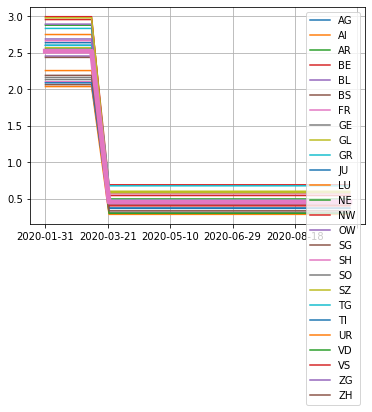

In [2]:
r_assign('ti_str', str(s.ti))
r_assign('tf_str', str(s.tf))
r_assign('foldername', '../data/ch/')
r_assign('setupname', 'Current')#s.setup_name)
r_source('NPI/NPI_for_baseline_deltas.R')
R0 = robjects.r['NPI'].T
R0.plot()
ax = R0.mean(axis=1).plot(lw=5)
ax.grid()

[1] "/Users/chadi/Documents/phd/COVID-19_CH/scenario-pipeline"


R[write to console]: Parsed with column specification:
cols(
  ShortName = col_character(),
  var = col_character(),
  ll_comp = col_character(),
  parset = col_double(),
  mean = col_double(),
  median = col_double(),
  q025 = col_double(),
  q975 = col_double(),
  q25 = col_double(),
  q75 = col_double()
)

R[write to console]: Parsed with column specification:
cols(
  Name = col_character(),
  ShortName = col_character(),
  CantonNumber = col_double(),
  FIPS = col_character(),
  NUTS = col_character(),
  pop2018 = col_double(),
  geoid = col_character()
)



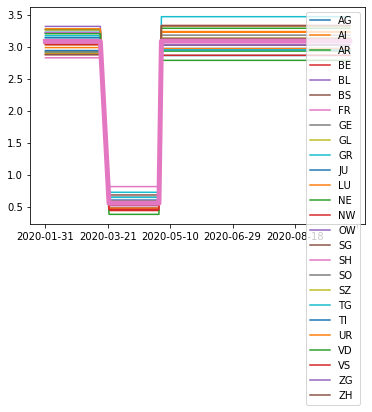

In [3]:
r_assign('ti_str', str(s.ti))
r_assign('tf_str', str(s.tf))
r_assign('foldername', '../data/ch/')
r_assign('setupname', 'Stopped')#s.setup_name)
r_source('NPI/NPI_for_baseline.R')
R0 = robjects.r['NPI'].T
R0.plot()
R0.mean(axis=1).plot(lw=5)

[1] "/Users/chadi/Documents/phd/COVID-19_CH/scenario-pipeline"


R[write to console]: Parsed with column specification:
cols(
  ShortName = col_character(),
  var = col_character(),
  ll_comp = col_character(),
  parset = col_double(),
  mean = col_double(),
  median = col_double(),
  q025 = col_double(),
  q975 = col_double(),
  q25 = col_double(),
  q75 = col_double()
)

R[write to console]: Parsed with column specification:
cols(
  Name = col_character(),
  ShortName = col_character(),
  CantonNumber = col_double(),
  FIPS = col_character(),
  NUTS = col_character(),
  pop2018 = col_double(),
  geoid = col_character()
)



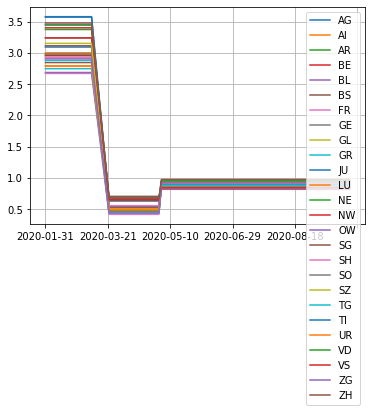

In [5]:
r_assign('ti_str', str(s.ti))
r_assign('tf_str', str(s.tf))
r_assign('foldername', '../data/ch/')
r_assign('setupname', 'R0-0dot9')#s.setup_name)
r_source('NPI/NPI_for_baseline_deltas.R')
R0 = robjects.r['NPI'].T
ax =R0.plot()
#ax = R0.mean(axis=1).plot(lw=5)
ax.grid()

In [107]:
mobility

<26x26 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [98]:
mobility_data = pd.read_csv('../data/ch/mobility_matrix_adj.csv')

In [120]:
mobility = scipy.sparse.csr_matrix((s.nnodes, s.nnodes))
for index, row in mobility_data.iterrows():
    mobility[s.spatset.nodenames.index(row['ori']),s.spatset.nodenames.index(row['dest'])] = row['amount']
    if (s.spatset.nodenames.index(row['ori']) == s.spatset.nodenames.index(row['dest'])):
        raise ValueError(f"Mobility fluxes with same origin and destination: '{row['ori']}' to {row['dest']} in long form matrix. This is not supported")

/usr/local/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [101]:
mobility_data['ori']

0      AG
1      AG
2      AG
3      AG
4      AG
       ..
217    ZH
218    ZH
219    ZH
220    ZH
221    ZH
Name: ori, Length: 222, dtype: object

In [114]:
s.spatset.nodenames.index(row['ori'])

25

In [113]:
row

ori            ZH
dest           ZG
amount    21528.8
Name: 221, dtype: object